In [1]:
# importing packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# loading the data
df = pd.read_csv("C://Users//Admin//Documents//Coding DOCS//CampusX Data Science//Datasets//IPL_matches.csv")

## EDA on IPL Matches Dataset 2008-2024

### 1. Understanding the Data:

In [3]:
# how does the data look like?
df.sample(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
985,1359510,2023,Bengaluru,2023-04-26,League,CV Varun,"M Chinnaswamy Stadium, Bengaluru",Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,21.0,201.0,20.0,N,NaN,KN Ananthapadmanabhan,R Pandit
622,1082637,2017,Chandigarh,2017-05-07,League,DR Smith,"Punjab Cricket Association IS Bindra Stadium, ...",Kings XI Punjab,Gujarat Lions,Gujarat Lions,field,Gujarat Lions,wickets,6.0,190.0,20.0,N,NaN,A Nand Kishore,VK Sharma
915,1304086,2022,Mumbai,2022-04-27,League,Umran Malik,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,Gujarat Titans,Gujarat Titans,field,Gujarat Titans,wickets,5.0,196.0,20.0,N,NaN,CB Gaffaney,Navdeep Singh
163,419154,2009/10,Jaipur,2010-04-14,League,KP Pietersen,Sawai Mansingh Stadium,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,bat,Royal Challengers Bangalore,wickets,5.0,131.0,20.0,N,NaN,BR Doctrove,S Ravi
565,980997,2016,Visakhapatnam,2016-05-17,League,AB Dinda,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Rising Pune Supergiants,Delhi Daredevils,Rising Pune Supergiants,field,Rising Pune Supergiants,runs,19.0,58.0,11.0,N,D/L,Nitin Menon,C Shamshuddin


In [4]:
# how big is the data? 
df.shape

(1095, 20)

In [5]:
# info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [6]:
# missing values
df.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [7]:
# duplicated values
df.duplicated().sum()

0

In [8]:
# statistical data representation
df.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


### 2. Univariate Analysis:
(individually analyzing each column)

In [9]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


### a. Season:

In [10]:
df.season.unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024'], dtype=object)

In [11]:
df.drop(columns=['season'],inplace=True)

### b. City:

In [12]:
len(df.city.unique())

37

<Axes: xlabel='city'>

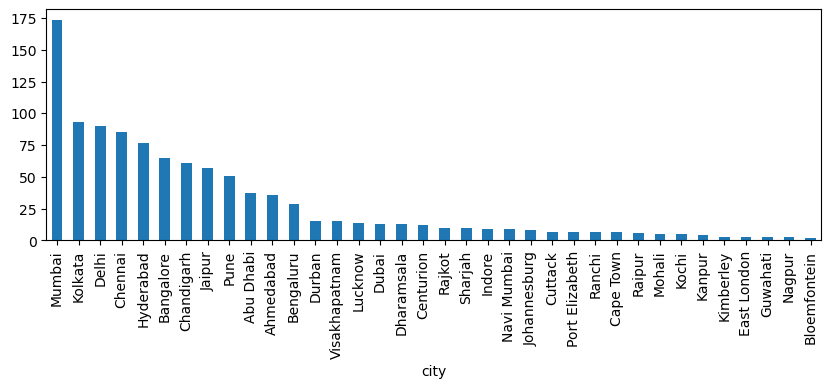

In [13]:
plt.figure(figsize=(10,3))
df.city.value_counts().plot(kind='bar')

### c. Date:
We can extract year, month, day and day_name from this date > Feature Engineering

In [14]:
df.date = pd.to_datetime(df.date)

In [15]:
df.dtypes

id                          int64
city                       object
date               datetime64[ns]
match_type                 object
player_of_match            object
venue                      object
team1                      object
team2                      object
toss_winner                object
toss_decision              object
winner                     object
result                     object
result_margin             float64
target_runs               float64
target_overs              float64
super_over                 object
method                     object
umpire1                    object
umpire2                    object
dtype: object

In [18]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day_name()

In [19]:
df.head()

,id,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,...,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,month,day,year
0,335982,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,April,Friday,2008
1,335983,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,...,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,April,Saturday,2008
2,335984,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,...,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,April,Saturday,2008
3,335985,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,...,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,April,Sunday,2008
4,335986,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,...,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,April,Sunday,2008


### d. Match_type:

In [30]:
df.match_type.value_counts()

match_type
League                1029
Final                   17
Qualifier 1             14
Qualifier 2             14
Eliminator              11
Semi Final               6
Elimination Final        3
3rd Place Play-Off       1
Name: count, dtype: int64

In [42]:
# elimination final is same as eliminator
df['match_type'] = df['match_type'].str.replace('Elimination Final','Eliminator')

In [43]:
df.match_type.value_counts()

match_type
League                1029
Final                   17
Qualifier 1             14
Eliminator              14
Qualifier 2             14
Semi Final               6
3rd Place Play-Off       1
Name: count, dtype: int64

### e. Player of the match:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AB de Villiers'),
  Text(1, 0, 'CH Gayle'),
  Text(2, 0, 'RG Sharma'),
  Text(3, 0, 'DA Warner'),
  Text(4, 0, 'V Kohli'),
  Text(5, 0, 'MS Dhoni'),
  Text(6, 0, 'SR Watson'),
  Text(7, 0, 'YK Pathan'),
  Text(8, 0, 'RA Jadeja'),
  Text(9, 0, 'AD Russell')])

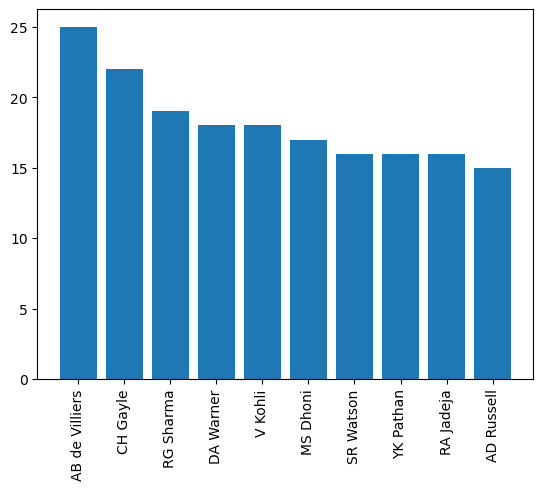

In [53]:
plt.bar(x=df.player_of_match.value_counts().index[:10],height=df.player_of_match.value_counts().values[:10])
plt.xticks(rotation='vertical')

### f. Teams:

In [66]:
pd.concat([df.team1,df.team2]).unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

### g. toss_decision:

In [67]:
df.toss_decision.unique()

array(['field', 'bat'], dtype=object)

<Axes: xlabel='toss_decision'>

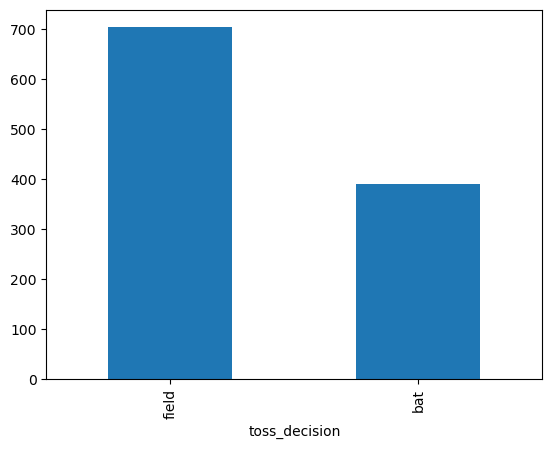

In [70]:
df.toss_decision.value_counts().plot(kind='bar')

### h. Result and Result_margin:

result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64


<Axes: xlabel='result'>

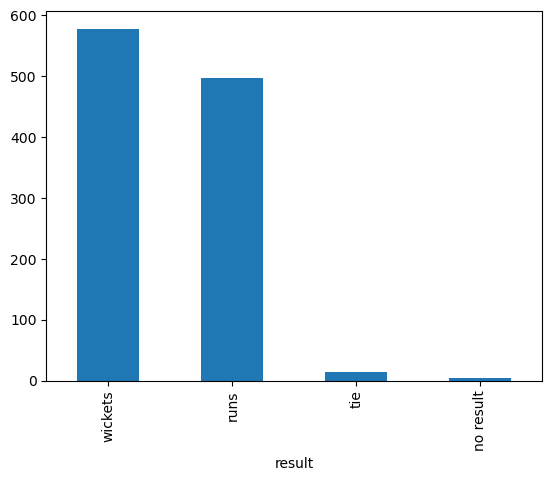

In [74]:
print(df.result.value_counts())
df.result.value_counts().plot(kind='bar')

In [77]:
# if by wickets : (win through a successful chase)
df[df['result']=='wickets'].iloc[0]

id                              335984
city                             Delhi
date               2008-04-19 00:00:00
match_type                      League
player_of_match            MF Maharoof
venue                 Feroz Shah Kotla
team1                 Delhi Daredevils
team2                 Rajasthan Royals
toss_winner           Rajasthan Royals
toss_decision                      bat
winner                Delhi Daredevils
result                         wickets
result_margin                      9.0
target_runs                      130.0
target_overs                      20.0
super_over                           N
method                             NaN
umpire1                      Aleem Dar
umpire2                 GA Pratapkumar
month                            April
day                           Saturday
year                              2008
Name: 2, dtype: object